<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>
<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<h3 align='center'> Maria Jose Apolo Rol: 201573509-3 </h3>
<h3 align='center'> Diego Gutierrez Rol: 201573558-1 </h3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

In [105]:
import numpy as np
import sklearn as skl
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import time
from ipywidgets import interact, interactive, fixed, interact_manual

<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).


> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

Se crean dos funciones:

1) Prediction: Realiza la predicción para una instancia x especifica del conjunto de entrenamiento/test. Retorna un entero 1 o 0 correspondiente a la salida del input.

2) Prediction_X: Realiza una predicción para todo el conjunto de instancias dado los pesos W. Retorna una lista con todas las predicciones. 

Obs: El bias se trabaja de manera separada.

In [30]:
def prediction(x, W, bias):
    suma_producto = np.dot(x, W)
    if suma_producto + bias >= 0:          
        Y_predict = 1
    else:          
        Y_predict = 0
    return Y_predict

def prediction_X(X,W,bias):
    
    Y = []
    for x in X:
        result = prediction(x,W,bias)
        Y.append(result)
    return np.array(Y)


> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.

El perceptrón se divide en dos funciones: Inicializar y perceptrón.

La primera de ellas inicializa las variables W y b correspondientes al vector de pesos y bias respectivamente.
La segunda de ellas realiza el algoritmo del perceptrón, actualizando los pesos dada la predicción realizada por la función anterior. Retorna los pesos finales, el bias y un diccionario "acc" que corresponde a la accuraccy durante el entrenamiento/test.

In [84]:
#Se aplica el algoritmo del perceptrón para ajustar los valores de W
def inicializar(X):
    W = np.zeros(X.shape[1])
    b = 0
    return W,b

def perceptron(X, Y, lr, loops, W, b):
    acc = {}
    max_acc = 0 
    for i in range(loops):
        Y_predicted=[]
        iter=0
        for x, y in zip(X, Y):
            y_pred = prediction(x,W,b)
            if y!=y_pred:
                W = W + lr*(y-y_pred)*x
                b = b + lr*(y-y_pred)*1
            acc[iter] = skl.metrics.accuracy_score(prediction_X(X,W,b), Y)
            iter=iter+1
            Y_predicted.append(y_pred)
#             if (acc[iter] > max_acc):
#                 max_acc = acc[iter]
#             iter = iter + 1
    return W,b,acc
        
    

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
>
>Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.


Primero, se realiza una función que carga los datos de entrenamiento y de test que se utilizaran. Estos antes de ser divididos son preprocesados y normalizados. Se utiliza un test_size del 20% de los datos.

In [102]:
from sklearn.model_selection import train_test_split
def load_data():
    X_train,Y_train = load_breast_cancer(return_X_y=True)
    scaler = skl.preprocessing.StandardScaler().fit(X_train)
    X_train = scaler.transform(X_train)
    X_train, X_test, Y_train, Y_test = train_test_split(X_train, Y_train, test_size=0.2)
    return X_train,X_test,Y_train,Y_test


Luego, se realiza dos veces el algoritmo del perceptrón: Uno para el conjunto de entrenamiento y otro para el de Test. El de test trabaja con los pesos y bias obtenidos durante el entrenamiento, con el fin de que exista un entrenamiento de la maquina.
Se grafican ambas acuraccy de la cual podemos ver que existe un crecimiento durante el entrenamiento mientras que para los datos de test se obtiene una acuraccy practicamente constante de casi 100%.
Para el cálculo de la acuraccy, se compara la predicción para todas las instancias de X con los pesos calculados en cada iteración y la salida Y. 


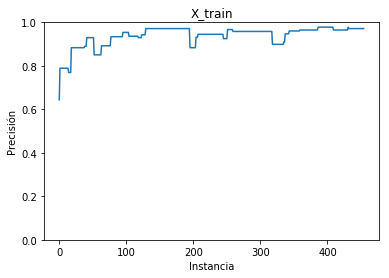

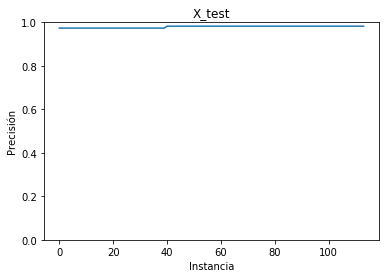

--- 0.5480208396911621 Segundos ---


In [114]:
X_train, X_test, Y_train, Y_test=load_data()
W,b=inicializar(X_train)
#Perceptron(Inputs,Outputs,Learning Rate,Loops,Weights,Bias)
start=time.time()
W1,b1,acc=perceptron(X_train,Y_train,0.1,1,W,b)
W2,b2,acc2=perceptron(X_test,Y_test,0.1,1,W1,b1)
def plot(nombre,accuraccy):
    plt.title(str(nombre))
    plt.plot(accuraccy.values())
    plt.xlabel("Instancia")
    plt.ylabel("Precisión")
    plt.ylim([0, 1])
    plt.show()
    
plot("X_train",acc)
plot("X_test",acc2)
print("--- %s Segundos ---" % (time.time() - start))

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.



> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.


### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

Se realiza la función sigmoidal, la cual entrega el cómputo de la función sigmoidal.Además, se crea la función que entrega la salida del modelo $g(x; w,b)$ utilizando la función creada anteriormente.

In [94]:
def sigmoidal(Epsilon):
    return 1/(1+np.exp(-Epsilon))

def g(x, W, bias):
    predict = np.dot(x, W) + bias
    g_eval=sigmoidal(predict)          
    return g_eval



> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.


In [95]:
def CrossEntropy(y, yHat):
    if y == 1:
      return -np.log(yHat)
    else:
      return -np.log(1 - yHat)

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

$$
    \frac{\partial L}{\partial w} = \frac{\partial L}{\partial g}\frac{\partial g}{\partial w}
$$

$$
    \frac{\partial L}{\partial g} = \frac{-y}{g(x;w,b)}+\frac{1-y}{1-g(x;w,b)}
$$

$$
    \frac{\partial g}{\partial w} = {g(x;w,b)}{(1-g(x;w,b))}{x}
$$


> Multiplicando y simplificando terminos queda:


$$
    \frac{\partial L}{\partial w} = {x}{(g(x;w,b)-y)}
$$


In [96]:
def gradient(y,g_eval,x):
    return x*(g_eval-y)

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$


Se realiza la función "perceptron_modified", la cual es una modificación de la función realizada en b). Esta calcula la salida del método utilizando la función g(x,w,b). A diferencia del anterior que solo actualizaba sus pesos cuando fallaba, este calcula los pesos para todas las instancias utilizando el valor del gradiente. 


Además, se llama la función "prediction_X_sigmoidal", la cual realiza una predicción de las salidas para todas las instancias $X^i$ utilizando la función g(x,w,b) con los pesos actualizados. Dado que las salidas de la función sigmoidal entrega valores continuos entre 0 y 1, se aplica un redondeo a las salidas de la función, entregando valores 1 cuando la función sigmoidal es mayor o igual a 0.5 y 0 cuando es menor.

In [97]:
def prediction_X_sigmoidal(X,W,bias):    
    Y = []
    for x in X:
        result = g(x,W,bias)
        Y.append(result)
    Y=np.array(Y)
    for i in range(len(Y)):
        if Y[i]>=0.5:
            Y[i]=1
        else:
            Y[i]=0
    return np.array(Y)

def perceptron_modified(X, Y, lr, loops,W,b):
    acc = {}
    max_acc = 0 
    for i in range(loops):
        loss = []
        iter=0
        for x, y in zip(X, Y):
            g_eval=g(x,W,b)
            gradiente=gradient(y,g_eval,x)
            W = W -lr*gradiente
            b = b - lr*(y-g_eval)*1
            perdida=CrossEntropy(y,g_eval)
            loss.append(perdida)
            predicted=prediction_X_sigmoidal(X,W,b)
            acc[iter]=skl.metrics.accuracy_score(predicted, Y)
            iter+=1
    plt.plot(loss)
    plt.xlabel("Instancia de X")
    plt.ylabel("Perdida")
    plt.show()
    plt.plot(acc.values())
    plt.xlabel("Numero de X considerados")
    plt.ylabel("Acuraccy")
    plt.ylim([0, 1])
    plt.show()
    return W,b

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

Las 2 primeras gráficas corresponden al conjunto de entrenamiento mientras que las 2 últimas corresponden al conjunto de test. Se puede ver que la perdida va disminuyendo a medida que avanzan las iteraciones, lo cual concuerda con lo esperado en una función loss.
Por otro lado, la acuraccy va aumentando en el conjunto de entrenamiento y se mantiene constante en la de test en un valor muy cercano a 1. Si se tuviera una mayor cantidad de datos de entrenamiento, para el conjunto de test la acuraccy seria aún más cercana a 1.

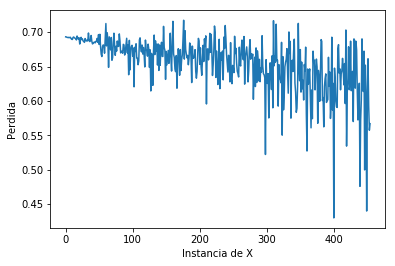

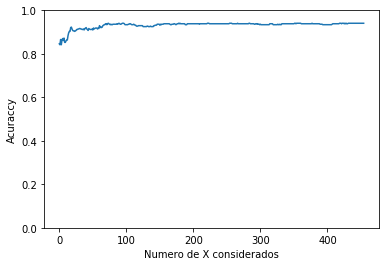

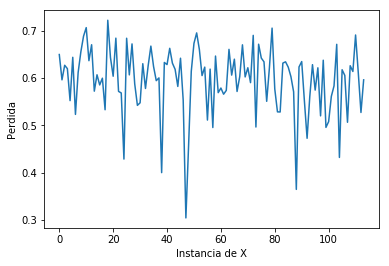

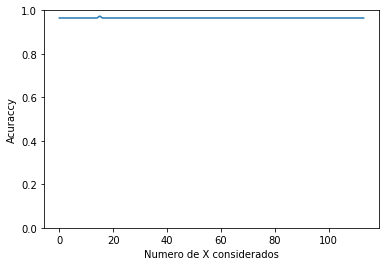

--- 1.3280255794525146 Segundos ---


In [113]:
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = skl.preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train, X_test, Y_train, Y_test = train_test_split(X_train, y_train, test_size=0.2)
W1,b1=inicializar(X_train)
#print(W1,b1)
start=time.time()
W2,b2=perceptron_modified(X_train,Y_train,0.0001,1,W1,b1)
#print(W2,b2)
W3,b3=perceptron_modified(X_test,Y_test,0.0001,1,W2,b2)
#print(W3,b3)
print("--- %s Segundos ---" % (time.time() - start))

## Conclusiones

A partir de lo realizado durante la tarea, podemos concluir que pese a ser el primer algoritmo que presentaba redes neuronales entrega un buen aprendizaje al aprender una función de separación lineal para un problema de clasificación binaria. Este algoritmo va aprendiendo de una instancia de dato a la vez, modificando sus parametros para mejorar el aprendizaje. Esto queda demostrado en las gráficas de acuraccy, donde esta iba en aumento al ir aprendiendo de cada instancia.

Se trabajo con dos conjuntos de datos (entrenamiento y test) para poder evaluar como el algoritmo aprendia y entregaba salidas para instancias que el algoritmo no habia visto antes. Podemos ver que para el conjunto de test, la acuraccy es muy cercana a 1, por lo que se puede concluir que el algoritmo si realizo un aprendizaje durante el entrenamiento, entregando una salida casi 100% correcta para un nuevo conjunto de test.

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  